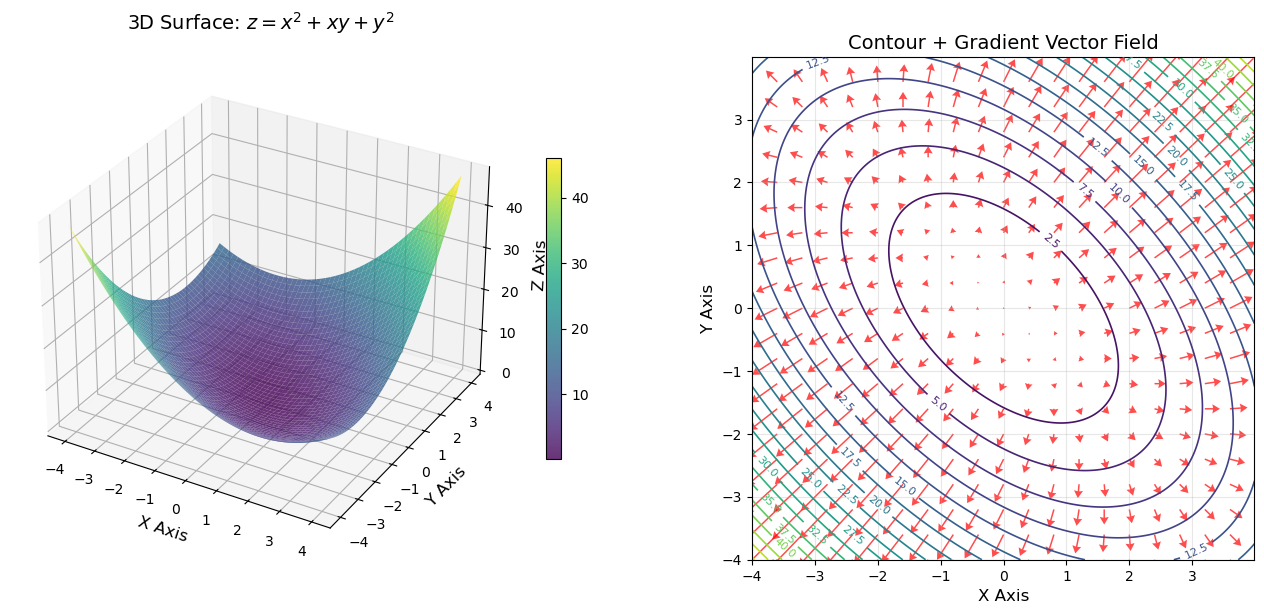

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. 生成数据网格
x = np.arange(-4, 4, 0.01)  # x范围：0~4，步长0.01（密集网格用于3D曲面）
y = np.arange(-4, 4, 0.01)
X, Y = np.meshgrid(x, y)  # 生成2D网格矩阵

# 2. 计算函数值 z 和梯度 (dx, dy)
z = X**2 + X*Y + Y**2  # 原函数
dx = 2*X + Y           # 对x的偏导（梯度x分量）
dy = X + 2*Y           # 对y的偏导（梯度y分量）

# 3. 创建画布（2个子图：3D曲面 + 2D等高线+梯度）
fig = plt.figure(figsize=(14, 6))

# 子图1：3D曲面图（展示函数空间形态）
ax1 = fig.add_subplot(121, projection='3d')
surface = ax1.plot_surface(
    X, Y, z,
    cmap='viridis',  # 颜色映射（反映z值大小）
    alpha=0.8,       # 透明度
    edgecolor='none',# 隐藏曲面边缘线
    antialiased=True # 抗锯齿
)
# 美化3D图
ax1.set_xlabel('X Axis', fontsize=12)
ax1.set_ylabel('Y Axis', fontsize=12)
ax1.set_zlabel('Z Axis', fontsize=12)
ax1.set_title('3D Surface: $z = x^2 + xy + y^2$', fontsize=14, pad=20)
fig.colorbar(surface, ax=ax1, shrink=0.6)  # 颜色条（对应z值）

# 子图2：2D等高线 + 梯度向量场（展示梯度方向）
ax2 = fig.add_subplot(122)
# 绘制等高线（z的等值线）
contour = ax2.contour(
    X, Y, z,
    levels=20,        # 等高线数量
    cmap='viridis',
    linewidths=1.2
)
ax2.clabel(contour, inline=True, fontsize=8)  # 标注等高线数值

# 抽取稀疏网格绘制梯度箭头（避免箭头重叠，每隔40个点取1个）
step = 40
X_sparse = X[::step, ::step]
Y_sparse = Y[::step, ::step]
dx_sparse = dx[::step, ::step]
dy_sparse = dy[::step, ::step]

# 绘制梯度向量场（quiver：箭头图）
ax2.quiver(
    X_sparse, Y_sparse,  # 箭头起点坐标
    dx_sparse, dy_sparse, # 箭头x/y方向分量
    color='red',         # 箭头颜色
    angles='xy',         # 箭头角度基于x/y轴
    scale_units='xy',    # 缩放基于x/y轴
    scale=20,            # 箭头长度缩放（值越大箭头越短）
    headwidth=6,         # 箭头头部宽度
    alpha=0.7            # 透明度
)
# 美化2D图
ax2.set_xlabel('X Axis', fontsize=12)
ax2.set_ylabel('Y Axis', fontsize=12)
ax2.set_title('Contour + Gradient Vector Field', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')  # 等比例坐标轴

plt.tight_layout()
plt.show()